In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/Users/starboy/Documents/Projects/credit_risk_segmentation/data/processed/model_ready_data.csv")

In [6]:
def assign_segment(row):
    if row["credit_history_years"] < 5:
        return "Thin Credit"
    if row["loan_to_income"] > 0.25 and row["debt_to_income"] < 20:
        return "Loan Heavy"
    if row["debt_to_income"] >= 20:
        return "Debt Stressed"
    return "Low Stress"

df["customer_segment"] = df.apply(assign_segment, axis=1)


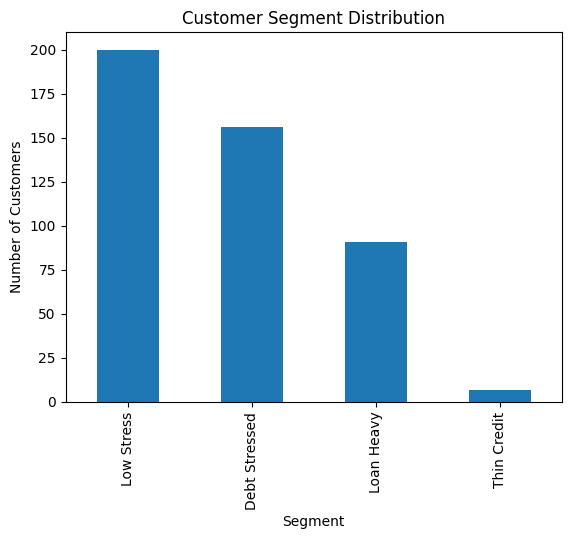

In [7]:
df["customer_segment"].value_counts().plot(kind="bar")
plt.title("Customer Segment Distribution")
plt.ylabel("Number of Customers")
plt.xlabel("Segment")
plt.show()


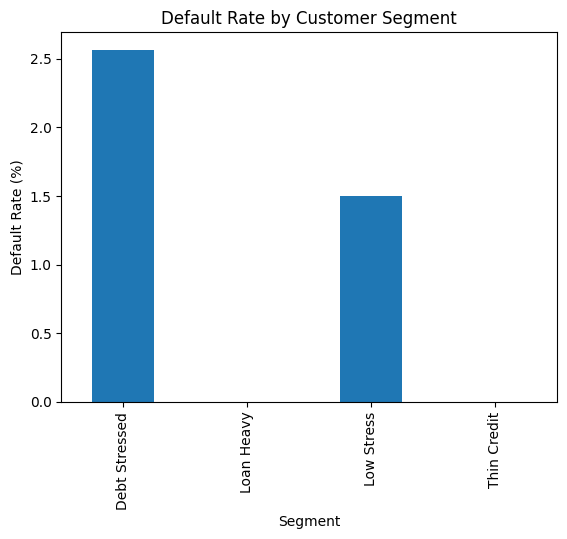

In [8]:
(df.groupby("customer_segment")["target"].mean() * 100).plot(kind="bar")
plt.title("Default Rate by Customer Segment")
plt.ylabel("Default Rate (%)")
plt.xlabel("Segment")
plt.show()
